케라스의 mnist 데이터셋을 가져와 사용하기
- fashion_mnist를 가져와 사진이 무슨 종류의 옷인지 구별하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/

!pwd

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive


4422102/4422102 [==============================] - 0s 0us/step


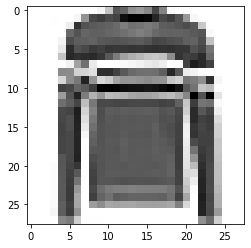

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import os

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

plt.imshow(X_train[5], cmap='Greys')
plt.show()

In [ ]:
## 2차원인 Data Frame은 3차원 이상인 numpy.ndarray를 바로는 감당하지 못함.

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint("/content/drive/My Drive/MNIST_CNN.hdf5", monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.34384, saving model to /content/drive/My Drive/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.34384 to 0.29828, saving model to /content/drive/My Drive/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.29828 to 0.26015, saving model to /content/drive/My Drive/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.26015 to 0.23539, saving model to /content/drive/My Drive/MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.23539

Epoch 6: val_loss improved from 0.23539 to 0.22390, saving model to /content/drive/My Drive/MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.22390

Epoch 8: val_loss did not improve from 0.22390

Epoch 9: val_loss improved from 0.22390 to 0.22249, saving model to /content/drive/My Drive/MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.22249

Epoch 11: val_loss did not improve from 0.22249

Epoch 12: val_loss did not improve from 0.22249

Epoch 13: val_loss did not improve from 0.22249

Epoch 14: val_l

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 20s 63ms/step - loss: 0.2719 - accuracy: 0.9216

 Test Accuracy: 0.9216


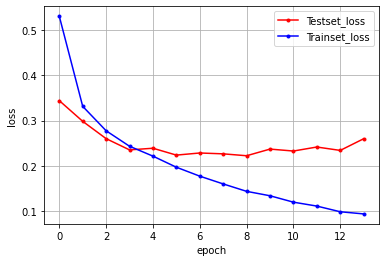

In [ ]:
# 검증셋과 학습셋의 오차를 그래프로 표현
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

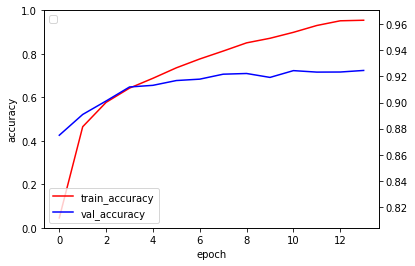

In [ ]:
import numpy as np

fig, accuracy_ax = plt.subplots()
acc_ax = accuracy_ax.twinx()


acc_ax.plot(history.history['accuracy'], 'r', label = 'train_accuracy') 
acc_ax.plot(history.history['val_accuracy'], 'b', label = 'val_accuracy')

accuracy_ax.set_xlabel('epoch')
accuracy_ax.set_ylabel('accuracy')

accuracy_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()